## Contexte de l'analyse


Dans cet exercice, vous êtes Data Scientist dans une **start-up de la EdTech**, nommée ***academy***, qui propose des ```contenus de formation en ligne pour un public de niveau lycée et université```.

**Mark**, votre manager, vous a convié à une réunion pour vous présenter le projet d’**expansion à l’international** de l’entreprise. Il vous confie **une première mission d’analyse exploratoire**, pour déterminer si les données sur l’éducation de la banque mondiale permettent d’enrichir la réflexion autour du projet d’expansion

Mark aimerait explorer les pays avec un fort potentiel de clients pour les services de ***academy***, et voir comment ce potentiel pourrait évoluer.

Vous allez répondre à la demande de Mark en suivant l’ensemble des exercices entièrement guidés. A la fin des exercices, vous aurez réussi à déterminer si ces jeux de données peuvent fournir des insights guidant ***academy*** à décider dans **quels pays s’implanter**.

Ce premier exercice vous fait mener une première analyse en surface des différents jeux de données.

Je charge les différentes bibliothèques que je vais utiliser le long du projet

In [1]:
# Charger les bibliothèques nécessaires
import pandas as pd # Pour la manipulation des données
import matplotlib.pyplot as plt # Pour la visualisation des données
import seaborn as sns # Pour des visualisations statistiques avancées
import numpy as np # Pour les opérations numériques
from pathlib import Path # Pour la gestion des chemins de fichiers
import matplotlib.patches as mpatches # Pour les légendes personnalisées dans les graphiques


Je charge ma bibliothèque persos pour le projet

In [2]:
# Charger la bibliothèque perso oc_tools
import sys
from pathlib import Path
repo_root = Path().resolve().parent.parent  # t:/Projets/Pro/OPC-Data_Engineer
if str(repo_root) not in sys.path:
    sys.path.insert(0, str(repo_root))
try:
    from oc_tools import cleaning as cln, load_save as ls, exploration as exp
except ModuleNotFoundError as exc:
    raise ModuleNotFoundError("oc_tools introuvable : vérifie que le repo parent est bien dans sys.path et que le kernel utilise le bon venv.") from exc

Je prépare des variable contenant les chemins des dossiers dont j'aurais besoin tout du long du projet

In [3]:
# chemin du dossier du projet
base_dir = Path().resolve().parent

# Définir le chemin du dossier des données brutes
raw_data_dir = base_dir / "data" / "raw"

# Définir le chemin du dossier des données traitées
processed_data_dir = base_dir / "data" / "processed"

## Partie 1

### Etape 1 - Chargez les données dans le Notebook

Je commence par récupérer les chemins des fichiers compris dans mon dossier de données brutes puis je ne conserve que les nom des fichiers.

In [4]:
files = ls.list_raw_data_files(raw_data_dir)  # Utiliser la fonction pour obtenir la liste des fichiers

# Afficher la liste des fichiers
print(f"Voici la liste des fichiers disponibles dans le dossier des données brutes :")
for file in files:
    print(f"- {file}")

Voici la liste des fichiers disponibles dans le dossier des données brutes :
- EdStatsCountry-Series.csv
- EdStatsCountry.csv
- EdStatsData.csv
- EdStatsFootNote.csv
- EdStatsSeries.csv


Je crée un dictionnaire de dataframes pour être capable d'associer chaque jeu de données avec le nom de son fichier d'origine

In [5]:
dataframes = ls.load_all_raw_data(files, raw_data_dir)  # Utiliser la fonction pour charger les données

Pour une facilité d'utilisation de crée un mapping de nom avec les noms des fichiers

In [6]:
# Je crée un mapping de nom avec les noms de fichiers
mapping = {
    "country": "EdStatsCountry.csv",
    "country_series": "EdStatsCountry-Series.csv",
    "data": "EdStatsData.csv",
    "footnote": "EdStatsFootNote.csv",
    "series": "EdStatsSeries.csv"
}
dfs = {name: dataframes[key] for name, key in mapping.items()}

Je peux facilement relié chaque dataframes au fichier qui lui est associé grace a l'association clé-valeur.

In [7]:
for name, df in dfs.items():  # Utiliser la fonction pour afficher les premières lignes
    print(f"Preview du dataframe {name} :")
    display(df.head())
    print("\n")

Preview du dataframe country :


,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,...,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,...,NaN,2010,NaN,NaN,Yes,NaN,NaN,2012.0,NaN,NaN
1,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,...,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",NaN,2013/14,NaN,2012.0,2000,NaN
2,AGO,Angola,Angola,People's Republic of Angola,AO,Angolan kwanza,"April 2013 database update: Based on IMF data,...",Sub-Saharan Africa,Upper middle income,AO,...,General Data Dissemination System (GDDS),1970,"Malaria Indicator Survey (MIS), 2011","Integrated household survey (IHS), 2008",NaN,2015,NaN,NaN,2005,NaN
3,ALB,Albania,Albania,Republic of Albania,AL,Albanian lek,NaN,Europe & Central Asia,Upper middle income,AL,...,General Data Dissemination System (GDDS),2011,"Demographic and Health Survey (DHS), 2008/09",Living Standards Measurement Study Survey (LSM...,Yes,2012,2010.0,2012.0,2006,NaN
4,AND,Andorra,Andorra,Principality of Andorra,AD,Euro,NaN,Europe & Central Asia,High income: nonOECD,AD,...,NaN,2011. Population figures compiled from adminis...,NaN,NaN,Yes,NaN,NaN,2006.0,NaN,NaN




Preview du dataframe country_series :


,CountryCode,SeriesCode,DESCRIPTION,Unnamed: 3
0,ABW,SP.POP.TOTL,Data sources : United Nations World Population...,NaN
1,ABW,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
2,AFG,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
3,AFG,NY.GDP.PCAP.PP.CD,Estimates are based on regression.,NaN
4,AFG,SP.POP.TOTL,Data sources : United Nations World Population...,NaN




Preview du dataframe data :


,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,54.822121,54.894138,56.209438,57.267109,57.991138,59.36554,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN




Preview du dataframe footnote :


,CountryCode,SeriesCode,Year,DESCRIPTION,Unnamed: 4
0,ABW,SE.PRE.ENRL.FE,YR2001,Country estimation.,NaN
1,ABW,SE.TER.TCHR.FE,YR2005,Country estimation.,NaN
2,ABW,SE.PRE.TCHR.FE,YR2000,Country estimation.,NaN
3,ABW,SE.SEC.ENRL.GC,YR2004,Country estimation.,NaN
4,ABW,SE.PRE.TCHR,YR2006,Country estimation.,NaN




Preview du dataframe series :


,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,...,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
0,BAR.NOED.1519.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15-19 with...,Percentage of female population age 15-19 with...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BAR.NOED.1519.ZS,Attainment,Barro-Lee: Percentage of population age 15-19 ...,Percentage of population age 15-19 with no edu...,Percentage of population age 15-19 with no edu...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BAR.NOED.15UP.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15+ with n...,Percentage of female population age 15+ with n...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BAR.NOED.15UP.ZS,Attainment,Barro-Lee: Percentage of population age 15+ wi...,Percentage of population age 15+ with no educa...,Percentage of population age 15+ with no educa...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,BAR.NOED.2024.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 20-24 with...,Percentage of female population age 20-24 with...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Etape 2 - Collectez les informations basiques sur chaque jeu de données

##### Uniformisation des noms de colonnes

In [8]:
cln_dfs = {name: cln.uniformize_column_names(name, df) for name, df in dfs.items()}
print(f"Aperçu du dataframe country après uniformisation des noms de colonnes :")
display(cln_dfs["country"].head())

Aperçu du dataframe country après uniformisation des noms de colonnes :


,CountryCode,ShortName,TableName,LongName,2-alphacode,CurrencyUnit,SpecialNotes,Region,IncomeGroup,WB-2code,...,IMFdatadisseminationstandard,Latestpopulationcensus,Latesthouseholdsurvey,SourceofmostrecentIncomeandexpendituredata,Vitalregistrationcomplete,Latestagriculturalcensus,Latestindustrialdata,Latesttradedata,Latestwaterwithdrawaldata,Unnamed:31
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,...,NaN,2010,NaN,NaN,Yes,NaN,NaN,2012.0,NaN,NaN
1,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,...,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",NaN,2013/14,NaN,2012.0,2000,NaN
2,AGO,Angola,Angola,People's Republic of Angola,AO,Angolan kwanza,"April 2013 database update: Based on IMF data,...",Sub-Saharan Africa,Upper middle income,AO,...,General Data Dissemination System (GDDS),1970,"Malaria Indicator Survey (MIS), 2011","Integrated household survey (IHS), 2008",NaN,2015,NaN,NaN,2005,NaN
3,ALB,Albania,Albania,Republic of Albania,AL,Albanian lek,NaN,Europe & Central Asia,Upper middle income,AL,...,General Data Dissemination System (GDDS),2011,"Demographic and Health Survey (DHS), 2008/09",Living Standards Measurement Study Survey (LSM...,Yes,2012,2010.0,2012.0,2006,NaN
4,AND,Andorra,Andorra,Principality of Andorra,AD,Euro,NaN,Europe & Central Asia,High income: nonOECD,AD,...,NaN,2011. Population figures compiled from adminis...,NaN,NaN,Yes,NaN,NaN,2006.0,NaN,NaN


#### Dédoublonnage et suppression des colonnes trop vides et lignes de données vides

In [9]:
# Premiers nettoyage des données
cln_dfs = {name: cln.first_steps_cleaning(name, df, missing_threshold=0.7, dedup_subset=["CountryCode", "SeriesCode"]) for name, df in dfs.items()}

#### EdStatsCountry-Series

Dans ce jeu de données chaque ligne représente les métadonnée d'un KPI pour un pays avec les information de sources du KPI ou de méthode de calcul etc.

In [10]:
exp.collect_basic_info(cln_dfs["country_series"])  # Utiliser la fonction pour collecter les informations de base

This dataframe has 613 rows and 3 columns.
No numeric columns found.
Descriptive statistics for categorical columns:
Column 'CountryCode' value counts:
CountryCode
GEO    18
MDA    18
CYP    12
SRB    12
MUS    12
       ..
WSM     2
YEM     2
ZAF     2
ZMB     2
ZWE     2
Name: count, Length: 211, dtype: int64

Column 'SeriesCode' value counts:
SeriesCode
SP.POP.TOTL          211
SP.POP.GROW          211
NY.GDP.PCAP.PP.CD     19
NY.GNP.PCAP.PP.CD     19
NY.GDP.PCAP.PP.KD     19
NY.GNP.MKTP.PP.CD     14
NY.GDP.MKTP.PP.KD     14
NY.GDP.MKTP.PP.CD     14
SP.POP.1564.TO.ZS     13
SP.POP.TOTL.MA.ZS     13
SP.POP.TOTL.FE.ZS     13
SP.POP.0014.TO.ZS     13
NY.GNP.PCAP.CD         6
NY.GDP.PCAP.CD         5
NY.GDP.PCAP.KD         5
SP.POP.1564.MA.IN      4
SP.POP.0014.TO         4
SP.POP.1564.TO         4
SP.POP.1564.FE.IN      4
SP.POP.0014.MA.IN      4
SP.POP.0014.FE.IN      4
Name: count, dtype: int64

Column 'DESCRIPTION' value counts:
DESCRIPTION
Data sources : United Nations World Popula

#### EdStatsCountry

Dans ce jeu de données chaque ligne représente un pays/zone géographique avec ses caractéristiques descriptives.

In [11]:
exp.collect_basic_info(cln_dfs["country"])

This dataframe has 241 rows and 29 columns.
Descriptive statistics for numeric columns:
       Nationalaccountsreferenceyear  Latestindustrialdata  Latesttradedata
count                       32.00000            107.000000       185.000000
mean                      2001.53125           2008.102804      2010.994595
std                          5.24856              2.616834         2.569675
min                       1987.00000           2000.000000      1995.000000
25%                       1996.75000           2007.500000      2011.000000
50%                       2002.00000           2009.000000      2012.000000
75%                       2005.00000           2010.000000      2012.000000
max                       2012.00000           2010.000000      2012.000000
Descriptive statistics for categorical columns:
Column 'CountryCode' value counts:
CountryCode
ABW    1
AFG    1
AGO    1
ALB    1
AND    1
      ..
XKX    1
YEM    1
ZAF    1
ZMB    1
ZWE    1
Name: count, Length: 241, dtype: i

#### EdStatsData

Dans ce jeu de données chaque ligne correspond aux valeurs aux cours des années d'un KPI par pays

In [12]:
exp.collect_basic_info(cln_dfs["data"])

This dataframe has 357405 rows and 69 columns.
Descriptive statistics for numeric columns:
               1970          1971          1972          1973          1974  \
count  7.228800e+04  3.553700e+04  3.561900e+04  3.554500e+04  3.573000e+04   
mean   1.974772e+09  4.253638e+09  4.592365e+09  5.105006e+09  5.401493e+09   
std    1.211687e+11  1.804814e+11  1.914083e+11  2.059170e+11  2.112150e+11   
min   -1.435564e+00 -1.594625e+00 -3.056522e+00 -4.032582e+00 -4.213563e+00   
25%    8.900000e-01  8.853210e+00  9.240920e+00  9.595200e+00  9.861595e+00   
50%    6.317724e+00  6.316240e+01  6.655139e+01  6.969595e+01  7.087760e+01   
75%    6.251250e+01  5.655200e+04  5.863650e+04  6.202900e+04  6.383675e+04   
max    1.903929e+13  1.986457e+13  2.100916e+13  2.238367e+13  2.282991e+13   

               1975          1976          1977          1978          1979  \
count  8.730600e+04  3.748300e+04  3.757400e+04  3.757600e+04  3.680900e+04   
mean   2.314288e+09  5.731808e+09  6.12

#### EdStatsFootNote

Dans ce jeu de données chaque ligne apporte des précisions / commentaires a un KPI

In [13]:
exp.collect_basic_info(cln_dfs["footnote"])

This dataframe has 643638 rows and 4 columns.
No numeric columns found.
Descriptive statistics for categorical columns:
Column 'CountryCode' value counts:
CountryCode
LIC    7320
CYP    7183
LDC    6481
SSA    6389
SSF    6336
       ... 
IMN      32
CUW      23
XKX      12
MNP       4
FRO       2
Name: count, Length: 239, dtype: int64

Column 'SeriesCode' value counts:
SeriesCode
SH.DYN.MORT                  9226
SE.PRM.AGES                  8771
SE.PRM.DURS                  8771
SE.SEC.DURS                  8619
SE.SEC.AGES                  8581
                             ... 
NY.GNP.MKTP.PP.CD               1
NY.GNP.PCAP.PP.CD               1
UIS.AFR.SCHCENRESPR.23.PU       1
SL.UEM.TOTL.MA.ZS               1
UIS.XPubP.0                     1
Name: count, Length: 1558, dtype: int64

Column 'Year' value counts:
Year
YR2004    27128
YR2005    25992
YR2002    25687
YR2003    25683
YR2000    25093
YR2001    25047
YR2008    25018
YR1999    24938
YR2007    24263
YR2006    23394
YR2009  

#### EdStatsSeries

Dans ce jeu de données chaque ligne décris une série de statistique.

In [14]:
exp.collect_basic_info(cln_dfs["series"])

This dataframe has 3665 rows and 6 columns.
No numeric columns found.
Descriptive statistics for categorical columns:
Column 'SeriesCode' value counts:
SeriesCode
BAR.NOED.1519.FE.ZS            1
BAR.NOED.1519.ZS               1
BAR.NOED.15UP.FE.ZS            1
BAR.NOED.15UP.ZS               1
BAR.NOED.2024.FE.ZS            1
                              ..
UIS.XUNIT.USCONST.3.FSGOV      1
UIS.XUNIT.USCONST.4.FSGOV      1
UIS.XUNIT.USCONST.56.FSGOV     1
XGDP.23.FSGOV.FDINSTADM.FFD    1
XGDP.56.FSGOV.FDINSTADM.FFD    1
Name: count, Length: 3665, dtype: int64

Column 'Topic' value counts:
Topic
Learning Outcomes                                                                               1046
Attainment                                                                                       733
Education Equality                                                                               426
Secondary                                                                                      

### Etape 3 - Réalisez votre premier nettoyage

#### Conserver uniquement les données des pays

Apres une revue complète du fichier EdStatsCountry.csv il apparait que deux colonnes peuvent nous permettre de filtrer les entités qui ne sont pas des pays : ```Region``` et ```System of National Accounts```
- ```Region``` nous donne 2 faux positifs : Gibraltar et Nauru
- ```System of National Accounts``` nous donne 1 faux positif : Nauru

Ici nous allons filtrer selon la région et retirer les deux faux positif de la liste des faux pays

In [15]:
# Identifier les faux pays
faux_pays = cln_dfs["country"][cln_dfs["country"]["Region"].isna() & (~cln_dfs["country"]["CountryCode"].isin(["NRU", "GIB"]))]
faux_pays

,CountryCode,ShortName,TableName,LongName,2-alphacode,CurrencyUnit,SpecialNotes,Region,IncomeGroup,WB-2code,...,GovernmentAccountingconcept,IMFdatadisseminationstandard,Latestpopulationcensus,Latesthouseholdsurvey,SourceofmostrecentIncomeandexpendituredata,Vitalregistrationcomplete,Latestagriculturalcensus,Latestindustrialdata,Latesttradedata,Latestwaterwithdrawaldata
5,ARB,Arab World,Arab World,Arab World,1A,NaN,Arab World aggregate. Arab World is composed o...,NaN,NaN,1A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57,EAP,East Asia & Pacific (developing only),East Asia & Pacific,East Asia & Pacific (developing only),4E,NaN,East Asia and Pacific regional aggregate (does...,NaN,NaN,4E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
58,EAS,East Asia & Pacific (all income levels),East Asia & Pacific (all income levels),East Asia & Pacific (all income levels),Z4,NaN,East Asia and Pacific regional aggregate (incl...,NaN,NaN,Z4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59,ECA,Europe & Central Asia (developing only),Europe & Central Asia,Europe & Central Asia (developing only),7E,NaN,Europe and Central Asia regional aggregate (do...,NaN,NaN,7E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60,ECS,Europe & Central Asia (all income levels),Europe & Central Asia (all income levels),Europe & Central Asia (all income levels),Z7,NaN,Europe and Central Asia regional aggregate (in...,NaN,NaN,Z7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
63,EMU,Euro area,Euro area,Euro area,XC,NaN,Euro area aggregate.,NaN,NaN,XC,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
68,EUU,European Union,European Union,European Union,EU,NaN,European Union aggregate.,NaN,NaN,EU,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
89,HIC,High income,High income,High income,XD,NaN,High income group aggregate. High-income econo...,NaN,NaN,XD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
92,HPC,Heavily indebted poor countries (HIPC),Heavily indebted poor countries (HIPC),Heavily indebted poor countries (HIPC),XE,NaN,Heavily indebted poor countries aggregate.,NaN,NaN,XE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
116,LAC,Latin America & Caribbean (developing only),Latin America & Caribbean,Latin America & Caribbean (developing only),XJ,NaN,Latin America and Caribbean regional aggregate...,NaN,NaN,XJ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Nous allons maintenant nettoyé le jeu de donnée EdStatsCountry des entités qui ne sont pas des pays

In [16]:
# supprimer les faux pays du dataframe EdStatsCountry
fake_codes = faux_pays["CountryCode"].tolist()
rl_country = cln_dfs["country"][~cln_dfs["country"]["CountryCode"].isin(fake_codes)]

On utilise maintenant un inner join pour filtrer les autres dataframes
Il est a noté que le jeu de données EdStatsSeries représente la liste des KPI il n'est donc pas necessaie de le filtrer

In [17]:
# Supprimer les faux pays des autres dataframes à l’aide d’un inner join et d’une boucle
country_dfs = {
    name: (rl_country if name == "country"  # on conserve le dataframe nettoyé pour les pays
           else df if name == "series"      # on conserve le dataframe des séries tel quel (pas de CountryCode)
           else df.merge(rl_country[["CountryCode"]], on="CountryCode", how="inner"))  # on filtre par CountryCode pour les autres
    for name, df in cln_dfs.items()
}

## Partie 2

### Etape 1 - Réduisez le périmètre en utilisant une approche métier

#### Identification de la catégorie métier des indicateurs

Dans le jeu de données EdStatsSeries ont retrouve une colonne ```Topic``` qui nous permet de récupérez le sujet général de chaque indicateur. De plus cette colonne a un taux de remplissage a 100% ce qui nous permet de catégoriser les indicateurs.

In [18]:
topic_counts = dfs["series"]["Topic"].value_counts().sort_index()
print(f"{topic_counts.size} catégories identifiées :")
print(topic_counts.to_string())

37 catégories identifiées :
Topic
Attainment                                                                                       733
Background                                                                                         2
EMIS                                                                                               2
Early Child Development (SABER)                                                                   12
Early Childhood Education                                                                         24
Economic Policy & Debt: National accounts: Atlas GNI & GNI per capita                              1
Economic Policy & Debt: National accounts: US$ at constant 2010 prices: Aggregate indicators       2
Economic Policy & Debt: National accounts: US$ at current prices: Aggregate indicators             3
Economic Policy & Debt: Purchasing power parity                                                    6
Education Equality                                       

#### Choix des indicateurs pertinents

L’objectif est d’identifier des pays avec un **fort potentiel de clients** (public lycée + université), et d’évaluer **comment ce potentiel peut évoluer**.
Les topics sélectionnés couvrent 4 piliers complémentaires.

##### Pilier 1 — Taille du marché (volume d’apprenants potentiels)**
Ce pilier mesure la **base adressable** (jeunes, élèves, étudiants) et sa dynamique.
- **Population** — Estime la taille brute du marché (notamment via les classes d’âge pertinentes).
- **Secondary** — Mesure le vivier “lycée” (inscriptions/achèvement), donc le pipeline direct de clients.
- **Tertiary** — Mesure le vivier “université” (inscriptions/diplômes), cible centrale pour academy.
- **Post-Secondary, Non-Tertiary** — Capte les filières post-bac courtes/pro, utiles si academy vise aussi ce segment intermédiaire.

##### Pilier 2 — Besoin et maturité éducative (capacité à apprendre + opportunités de remédiation)
Ce pilier évalue la **maturité du capital humain** et les **écarts de performance** où une EdTech peut créer de la valeur.
- **Attainment** — Indique le niveau d’éducation atteint, utile pour juger la maturité éducative et la demande potentielle.
- **Literacy** — Proxy de capacité à suivre des contenus en ligne (compréhension/lecture), surtout pour les jeunes.
- **Learning Outcomes** — Donne une mesure de qualité des apprentissages : un écart fort = opportunité de soutien/remédiation.

##### Pilier 3 — Accessibilité et segmentation du marché (qui peut réellement accéder/payer)
Ce pilier sert à estimer le **marché réellement accessible**, et à orienter la stratégie (B2C/B2B/B2G).
- **Education Equality** — Mesure les inégalités d’accès (genre/riche-pauvre/etc.), donc la convertibilité du potentiel théorique.
- **Social Protection & Labor** — Donne du contexte socio-économique et emploi, influençant la capacité à investir dans la formation.

##### Pilier 4 — Faisabilité de déploiement (conditions digitales, financières et institutionnelles)
Ce pilier évalue si academy peut **déployer efficacement** : connectivité, financement, cadre institutionnel, ouverture aux partenaires.
- **Infrastructure: Communications** — Mesure la connectivité (internet/mobile), prérequis clé pour une EdTech en ligne.
- **Expenditures** — Proxy de capacité de financement (public/privé) et d’effort éducatif du pays.
- **Economic Policy & Debt: National accounts… (constant 2010 US$)** — Donne un contexte macro (taille/solvabilité), utile pour arbitrer la viabilité commerciale.

##### Sous-ensemble “Institutionnel / gouvernance” (SABER et assimilés)
Ces topics ne mesurent pas le volume de clients, mais la **capacité du système** à adopter/financer/encadrer des solutions.
- **Engaging the Private Sector (SABER)** — Indique l’ouverture au privé, utile pour juger la facilité de partenariats et d’entrée sur le marché.

In [19]:
# Listage des catégories que l'on va conserver
relevent_topics = ['Population', 'Secondary', 'Tertiary', 'Post-Secondary/Non-Tertiary',
                 'Attainment', 'Literacy', 'Learning Outcomes',
                 'Education Equality', 'Social Protection & Labor: Labor force structure', 'Social Protection & Labor: Unemployment',
                 'Infrastructure: Communications', 'Expenditures', 'Economic Policy & Debt: National accounts: Atlas GNI & GNI per capita', 'Economic Policy & Debt: National accounts: US$ at constant 2010 prices: Aggregate indicators', 'Economic Policy & Debt: National accounts: US$ at current prices: Aggregate indicators', 'Economic Policy & Debt: Purchasing power parity',
                 'Engaging the Private Sector (SABER)']
# On vérifie qu'il n'y a pas d'erreur dans notre liste
available_topics = set(country_dfs["series"]["Topic"])
missing_topics = [topic for topic in relevent_topics if topic not in available_topics]
# On filtre le jeu de données
if missing_topics:
    print(f"Les KPIs suivants sont absents des données : {', '.join(missing_topics)}.")
else:
    kpi_dfs = country_dfs["series"][country_dfs["series"]["Topic"].isin(relevent_topics)]
    print(f"Après filtrage, {kpi_dfs.shape[0]} KPIs restent pour les catégories sélectionnées.")

Après filtrage, 3055 KPIs restent pour les catégories sélectionnées.


In [20]:
# Création des dataframes filtrés pour les pays et les KPIs
country_kpi_dfs = {
    name: (kpi_dfs if name == "series" # on conserve le dataframe des séries filtré
           else df if name == "country" # Il ny a pas de KPI à filtrer dans ce dataframe
           else df.merge(kpi_dfs[["SeriesCode"]], on="SeriesCode", how="inner"))  # on filtre par SeriesCode pour les autres
    for name, df in country_dfs.items()
}

#### Interprétation des colonnes années dans le jeu de donnée Data

Dans le jeu de données Data, chaque cellule contient une valeur du KPI pour un pays à une année donnée.

Il y a des années futures parce que certains indicateurs sont des projections/ scénarios pour des années à venir.
Le fichier mélange observation historiques et valeurs projetées.

Pour filtrer de manières éfficace il est nécessaire de traiter différemment les données historique et les données de projections.

##### Repérer les années fiables

Commençons par étudier les taux de remplissage par années pour vérifier si il y a des tranches d'années pertinentes ou des années qui ne sont pas pertinentes en terme analytique.

In [21]:
# Description des données par année
country_kpi_dfs["data"].loc[:, '1970':'2100'].describe()


,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100
count,6.135000e+04,1.648900e+04,1.612600e+04,1.610400e+04,1.616200e+04,6.757600e+04,1.664400e+04,1.678800e+04,1.662700e+04,1.649800e+04,...,51128.000000,51128.000000,51128.000000,51128.000000,51128.000000,51128.000000,51128.00000,51128.000000,51128.000000,51128.000000
mean,3.695193e+08,1.455525e+09,1.610987e+09,1.787149e+09,1.887613e+09,4.718279e+08,2.040373e+09,2.172954e+09,2.395339e+09,2.629768e+09,...,353.556995,357.289588,359.411441,359.871759,358.876836,356.866900,354.21677,350.966970,346.988116,342.272427
std,2.420816e+10,4.854850e+10,5.206681e+10,5.569351e+10,5.617889e+10,2.786734e+10,5.943468e+10,6.249005e+10,6.731949e+10,7.130304e+10,...,5642.124206,5751.913931,5848.760371,5933.192043,5999.904457,6049.528174,6085.45823,6105.723882,6105.735658,6086.049083
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,-1.830000,-1.630000,-1.440000,-1.260000,-1.090000,-0.920000,-0.78000,-0.650000,-0.550000,-0.450000
25%,6.000000e-01,9.577550e+00,9.984927e+00,1.063005e+01,1.087067e+01,9.600000e-01,1.052955e+01,1.058299e+01,1.118284e+01,1.100000e+01,...,0.030000,0.030000,0.030000,0.020000,0.020000,0.010000,0.01000,0.010000,0.010000,0.010000
50%,4.620000e+00,9.285886e+01,9.721858e+01,1.102592e+02,1.072299e+02,6.070000e+00,9.953863e+01,9.953397e+01,1.091664e+02,1.504137e+02,...,0.230000,0.230000,0.230000,0.230000,0.230000,0.230000,0.23000,0.230000,0.220000,0.220000
75%,4.230000e+01,6.194800e+04,6.827750e+04,7.191300e+04,7.342900e+04,4.873250e+01,7.362900e+04,7.426050e+04,7.853600e+04,8.173600e+04,...,7.492500,7.500000,7.405000,7.200000,7.000000,6.522500,5.90000,5.295000,4.500000,3.860000
max,4.779684e+12,4.937198e+12,5.197055e+12,5.490332e+12,5.461938e+12,5.451141e+12,5.744745e+12,6.009497e+12,6.343726e+12,6.545183e+12,...,606775.300000,644710.190000,675853.420000,700282.960000,717143.500000,727030.140000,731025.85000,728631.120000,719255.750000,703700.820000


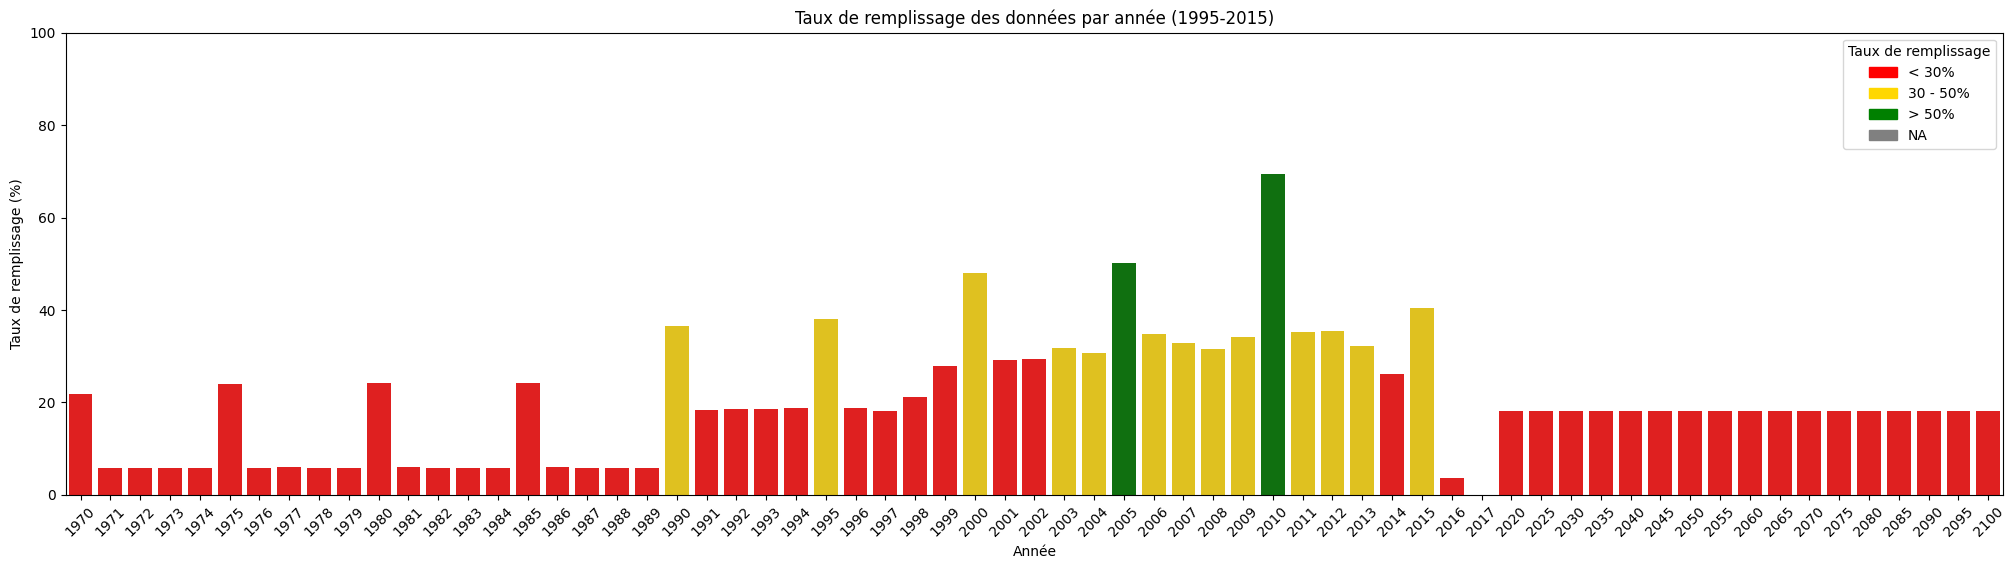

In [22]:
# Visualisation du taux de remplissage par année entre 1970 et 2015
filling_rate_per_year = country_kpi_dfs["data"].loc[:, '1970':'2100'].notna().mean()*100
df_plot = filling_rate_per_year.rename("fill").reset_index()
df_plot.columns = ["year", "fill"]

df_plot["cat"] = np.select(
    [
        df_plot["fill"] < 30,
        df_plot["fill"].between(30, 50, inclusive="both"),
        df_plot["fill"] > 50
    ],
    ["<30", "30-50", ">50"],
    default="NA"
)

palette = {"<30": "red", "30-50": "gold", ">50": "green", "NA": "gray"}
plt.figure(figsize=(25, 6))
sns.barplot(data=df_plot, x="year", y="fill", hue="cat", palette=palette, dodge=False, legend=True)
handles = [
    mpatches.Patch(color='red', label='< 30%'),
    mpatches.Patch(color='gold', label='30 - 50%'),
    mpatches.Patch(color='green', label='> 50%'),
    mpatches.Patch(color='gray', label='NA')
]
plt.legend(handles=handles, title="Taux de remplissage")
plt.xticks(rotation=45)
plt.ylim(0, 100)
plt.title("Taux de remplissage des données par année (1995-2015)")
plt.xlabel("Année")
plt.ylabel("Taux de remplissage (%)")
plt.show()

In [23]:
# Pourcentage de valeurs non manquantes dans les colonnes de 1970 à 2100
filling_rate_all = country_kpi_dfs["data"].loc[:, '1970':'2100'].notna().mean().mean()*100
# Pourcentage de valeurs non manquantes entre 1999 et 2015
filling_rate_1999_2015 = country_kpi_dfs["data"].loc[:, '2000':'2015'].notna().mean().mean()*100
# Pourcentage de valeurs non manquantes avant 1999
filling_rate_before_1999 = country_kpi_dfs["data"].loc[:, '1970':'1999'].notna().mean().mean()*100
# Pourcentage de valeurs non manquantes après 2015
filling_rate_after_2015 = country_kpi_dfs["data"].loc[:, '2016':'2100'].notna().mean().mean()*100
print(f"On obtient un taux de remplissage moyen par années de {filling_rate_all:.2f}%")
print(f"On obtient un taux de remplissage moyen par années entre 2000 et 2015 de {filling_rate_1999_2015:.2f}%")
print(f"On obtient un taux de remplissage moyen par années avant 2000 de {filling_rate_before_1999:.2f}%")
print(f"On obtient un taux de remplissage moyen par années après 2015 de {filling_rate_after_2015:.2f}%")


On obtient un taux de remplissage moyen par années de 20.38%
On obtient un taux de remplissage moyen par années entre 2000 et 2015 de 36.95%
On obtient un taux de remplissage moyen par années avant 2000 de 14.07%
On obtient un taux de remplissage moyen par années après 2015 de 16.38%


On remarque le faible taux de remplissage du jeux de données pour chaque année.
En effet on arrive qu'a ~20,4% de remplissage sur l'entièreté de la période 1970-2100.
Particulièrement 2017 qui n'a que 143 valeurs enregistrées.

Pour les années 1990, 1995, 2000, 2015 et entre 2003 et 2013 il y a un taux de remplissage suppérieur a 30%. Il semblerait que ces années soit les plus exploitables pour répondre au besoins analytiques.

On ne conservera que ces dernières pour nos analyses

In [24]:
# On crée une liste des années pertinentes
relevent_years = [1990, 1995, 2000, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2015]
# On filtre le dataframe des données pour ne conserver que les années pertinentes
country_kpi_relevant = country_kpi_dfs["data"][['CountryCode', 'SeriesCode'] + [str(year) for year in relevent_years]]
# On crée le dataframe projeté qui ne contient que les années à partir de 2020
future_years = [str(year) for year in range(2020, 2101) if str(year) in country_kpi_dfs["data"].columns]
projected_data = country_kpi_dfs["data"].loc[:, ['CountryCode', 'SeriesCode'] + future_years]

##### Etudier le remplissage par KPI

Continuons en étudiant le taux de remplissage par KPI pour identifier des KPI non pertinents.

In [25]:
# Passage en format long pour analyse des KPI
long_data_df = country_kpi_relevant.melt(
    id_vars=["CountryCode", "SeriesCode"],
    value_vars=[str(year) for year in relevent_years],
    var_name="Year",
    value_name="Value"
)

long_data_df.groupby("SeriesCode")["Value"].describe()

,count,mean,std,min,25%,50%,75%,max
SeriesCode,,,,,,,,
BAR.NOED.1519.FE.ZS,720.0,13.355722,20.145738,0.00000,0.550000,3.265000,17.610000,84.250000
BAR.NOED.1519.ZS,720.0,11.860236,17.205524,0.00000,0.700000,3.510000,16.310000,78.660000
BAR.NOED.15UP.FE.ZS,720.0,23.445014,24.915250,0.00000,3.960000,13.165000,38.520000,94.090000
BAR.NOED.15UP.ZS,720.0,19.787792,21.184750,0.00000,3.295000,10.785000,31.932500,84.040000
BAR.NOED.2024.FE.ZS,720.0,15.351222,22.310798,0.00000,0.600000,3.695000,21.460000,92.360000
...,...,...,...,...,...,...,...,...
UIS.XUNIT.USCONST.3.FSGOV,681.0,5844.574632,7085.672072,24.20005,848.425720,2557.530029,9570.742188,37546.070312
UIS.XUNIT.USCONST.4.FSGOV,373.0,6467.759719,13516.670277,2.00145,1218.665894,3215.977783,6845.509766,130873.773438
UIS.XUNIT.USCONST.56.FSGOV,882.0,6529.986636,9336.061624,50.44149,1100.048920,2303.610962,8925.218262,77432.476562


In [26]:
# Calcul des KPI avec les meilleurs taux de remplissage

## Nombre d'années renseignées par (pays, KPI)
nb_years_per_country_kpi = country_kpi_relevant[[str(year) for year in relevent_years]].notna().sum(axis=1)

## On crée une table minimale (country, kpi, nb_years_renseignées)
tmp = country_kpi_relevant[["CountryCode", "SeriesCode"]].copy()
tmp["NbYearsFilled"] = nb_years_per_country_kpi
tmp["has_data"] = tmp["NbYearsFilled"] > 0 # Indicateur binaire pour savoir si le Kpi a des données pour le pays

## Dénominateur pour le calcul du taux de remplissage par KPI
nb_country = tmp["CountryCode"].nunique()
nb_year = len([str(year) for year in relevent_years])

## Calculer les metriques par KPI
kpi_metrics = tmp.groupby("SeriesCode").apply(
    lambda x: pd.Series({
        "countries_with_data": x.loc[x["has_data"], "CountryCode"].nunique(),
        "countries_filling_rate": x.loc[x["has_data"], "CountryCode"].nunique() / nb_country * 100,
        "avg_years_per_country": x.loc[x["has_data"], "NbYearsFilled"].mean(),
        "median_years_per_country": x.loc[x["has_data"], "NbYearsFilled"].median(),
        "avg_years_filling_rate": x.loc[x["has_data"], "NbYearsFilled"].mean() / nb_year * 100,
        "total_data_points": x["NbYearsFilled"].sum(),
    })
).sort_values(["countries_filling_rate", "avg_years_per_country"], ascending=False)

kpi_metrics.head(10)

C:\Users\Paulo\AppData\Local\Temp\ipykernel_38744\1238443369.py:16: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  kpi_metrics = tmp.groupby("SeriesCode").apply(


,countries_with_data,countries_filling_rate,avg_years_per_country,median_years_per_country,avg_years_filling_rate,total_data_points
SeriesCode,,,,,,
NY.GDP.MKTP.CD,209.0,97.209302,14.334928,15.0,95.566188,2996.0
NY.GDP.PCAP.CD,209.0,97.209302,14.334928,15.0,95.566188,2996.0
SE.SEC.AGES,208.0,96.744186,14.692308,15.0,97.948718,3056.0
SE.SEC.DURS.UP,208.0,96.744186,14.692308,15.0,97.948718,3056.0
IT.NET.USER.P2,208.0,96.744186,14.149038,15.0,94.326923,2943.0
SE.SEC.ENRL.GC,208.0,96.744186,11.312500,13.0,75.416667,2353.0
SE.SEC.ENRL.GC.FE,208.0,96.744186,11.091346,13.0,73.942308,2307.0
SE.SEC.ENRL,206.0,95.813953,10.582524,12.0,70.550162,2180.0
SE.SEC.DURS,204.0,94.883721,14.941176,15.0,99.607843,3048.0


In [27]:
# Affichage des KPIs par ordre décroissant de nombre de pays avec données
kpi_metrics_sorted = kpi_metrics.sort_values(by="countries_with_data", ascending=False)
kpi_metrics_sorted.head(10)

,countries_with_data,countries_filling_rate,avg_years_per_country,median_years_per_country,avg_years_filling_rate,total_data_points
SeriesCode,,,,,,
NY.GDP.MKTP.CD,209.0,97.209302,14.334928,15.0,95.566188,2996.0
NY.GDP.PCAP.CD,209.0,97.209302,14.334928,15.0,95.566188,2996.0
SE.SEC.AGES,208.0,96.744186,14.692308,15.0,97.948718,3056.0
SE.SEC.DURS.UP,208.0,96.744186,14.692308,15.0,97.948718,3056.0
IT.NET.USER.P2,208.0,96.744186,14.149038,15.0,94.326923,2943.0
SE.SEC.ENRL.GC,208.0,96.744186,11.312500,13.0,75.416667,2353.0
SE.SEC.ENRL.GC.FE,208.0,96.744186,11.091346,13.0,73.942308,2307.0
SE.SEC.ENRL,206.0,95.813953,10.582524,12.0,70.550162,2180.0
SE.SEC.DURS,204.0,94.883721,14.941176,15.0,99.607843,3048.0


In [28]:
# conservation des KPIs avec au moins 80% de pays couverts
large_kpis = kpi_metrics[kpi_metrics["countries_filling_rate"] >= 80].index.tolist()
print(f"Nombre de KPIs avec au moins 80% de pays couverts : {len(large_kpis)}\n")
i = 0
kpi_list_temp = []
for kpi in sorted(large_kpis):
    kpi_list_temp.append(kpi)
    print(f"'{kpi}', ", end="")
    i += 1
    if i % 10 == 0:
        print()

Nombre de KPIs avec au moins 80% de pays couverts : 358

'IT.CMP.PCMP.P2', 'IT.NET.USER.P2', 'NY.GDP.MKTP.CD', 'NY.GDP.MKTP.KD', 'NY.GDP.MKTP.PP.CD', 'NY.GDP.MKTP.PP.KD', 'NY.GDP.PCAP.CD', 'NY.GDP.PCAP.KD', 'NY.GDP.PCAP.PP.CD', 'NY.GDP.PCAP.PP.KD', 
'NY.GNP.MKTP.CD', 'NY.GNP.MKTP.PP.CD', 'NY.GNP.PCAP.CD', 'NY.GNP.PCAP.PP.CD', 'SE.ENR.PRSC.FM.ZS', 'SE.ENR.SECO.FM.ZS', 'SE.ENR.TERT.FM.ZS', 'SE.SCH.LIFE', 'SE.SCH.LIFE.FE', 'SE.SCH.LIFE.MA', 
'SE.SEC.AGES', 'SE.SEC.CMPT.LO.FE.ZS', 'SE.SEC.CMPT.LO.MA.ZS', 'SE.SEC.CMPT.LO.ZS', 'SE.SEC.DURS', 'SE.SEC.DURS.UP', 'SE.SEC.ENRL', 'SE.SEC.ENRL.FE', 'SE.SEC.ENRL.FE.VO.ZS', 'SE.SEC.ENRL.FE.ZS', 
'SE.SEC.ENRL.GC', 'SE.SEC.ENRL.GC.FE', 'SE.SEC.ENRL.GC.FE.ZS', 'SE.SEC.ENRL.MA.VO.ZS', 'SE.SEC.ENRL.VO', 'SE.SEC.ENRL.VO.FE', 'SE.SEC.ENRL.VO.FE.ZS', 'SE.SEC.ENRL.VO.ZS', 'SE.SEC.ENRR', 'SE.SEC.ENRR.FE', 
'SE.SEC.ENRR.LO', 'SE.SEC.ENRR.LO.FE', 'SE.SEC.ENRR.LO.MA', 'SE.SEC.ENRR.MA', 'SE.SEC.ENRR.UP', 'SE.SEC.ENRR.UP.MA', 'SE.SEC.PRIV.ZS', 'SE.TER.ENRL', 'SE.TE

#### Sélection des KPIs les plus pertinents (à partir des 358 KPIs les mieux couverts)

Objectif : répondre à la demande de Mark en identifiant les pays à **fort potentiel de clients** pour *academy* (public **lycée + université**) et en évaluant **comment ce potentiel peut évoluer**.
Parmi les 358 KPIs (forte couverture pays), les plus pertinents sont ceux qui mesurent directement :
1) la **taille du marché** (volumes d’élèves/étudiants/jeunes),
2) la **dynamique éducative** (progression, achèvement),
3) la **capacité d’adoption du e-learning** (infrastructure numérique),
4) la **viabilité économique** (capacité à payer / financer).

##### Pilier 1 — Taille du marché (clients potentiels)
Ces KPIs quantifient le volume d’apprenants que *academy* peut cibler.

- **SP.POP.1524.TO.UN** — Taille de la population 15–24 ans : proxy central du marché adressable “jeunes”.
- **SE.SEC.ENRL** — Nombre d’inscrits au secondaire : vivier direct de clients niveau lycée.
- **SE.SEC.ENRR** — Taux brut de scolarisation au secondaire : mesure l’accès au secondaire et l’ampleur du pipeline.
- **SE.TER.ENRL** — Nombre d’inscrits dans le supérieur : vivier direct de clients niveau université.
- **SE.TER.ENRR** — Taux brut de scolarisation dans le supérieur : mesure l’expansion et la maturité du marché universitaire.
- **SE.SCH.LIFE** — Espérance de scolarisation : synthèse de l’exposition moyenne à l’éducation, utile pour comparer les pays.

##### Pilier 2 — Évolution et solidité du pipeline éducatif
Ces KPIs permettent d’évaluer si le marché est **en croissance** et si les apprenants restent dans le système (donc convertibles dans la durée).

- **SE.SEC.CMPT.LO.ZS** — Taux d’achèvement du 1er cycle du secondaire : indique la solidité du pipeline (moins d’abandon).
- **SE.TER.GRAD** — Diplômés du supérieur : proxy de “sortie” du système et de la dynamique du supérieur.
- **SE.ENR.TERT.FM.ZS** — Parité filles/garçons au supérieur : signale un élargissement du marché et une progression de l’accès.

##### Pilier 3 — Capacité d’adoption d’une EdTech en ligne (prérequis digitaux)
Un pays peut avoir un gros marché éducatif, mais si l’accès numérique est faible, l’adoption du e-learning est limitée.

- **IT.NET.USER.P2** — Part d’utilisateurs d’Internet : prérequis direct à la consommation de contenus en ligne.
- **IT.CMP.PCMP.P2** — Part de la population disposant d’un ordinateur : proxy d’équipement (utile si les usages sont PC-first).

##### Pilier 4 — Viabilité économique (capacité à payer et à financer)
Ces KPIs aident à arbitrer entre pays avec un potentiel éducatif similaire, en estimant la **solvabilité** (ménages et/ou institutions).

###### Solvabilité / pouvoir d’achat
- **NY.GDP.PCAP.CD** — PIB par habitant (US$ courant) : proxy simple de capacité moyenne à payer (B2C).
- **NY.GDP.PCAP.PP.CD** — PIB par habitant en PPA : meilleur proxy du pouvoir d’achat réel pour comparer les pays.
- **NY.GDP.MKTP.CD** — PIB total : indique la taille macro du marché, utile pour prioriser des pays “grands” (B2C/B2B/B2G).

###### Capacité de financement du secteur éducation (utile en B2G/B2B)
- **SE.XPD.TOTL.GD.ZS** — Dépenses d’éducation (% PIB) : effort national en éducation, capacité globale de financement.
- **SE.XPD.TOTL.GB.ZS** — Dépenses d’éducation (% budget public) : priorité budgétaire accordée à l’éducation.
- **SE.XPD.TERT.ZS** — Dépenses dédiées au supérieur : pertinent si la stratégie vise les universités/formation post-bac.

##### Synthèse de la shortlist recommandée
Pour une analyse exploratoire efficace, un noyau dur de KPIs peut être constitué autour de :
- **Marché/pipeline** : SP.POP.1524.TO.UN, SE.SEC.ENRL, SE.SEC.ENRR, SE.SEC.CMPT.LO.ZS, SE.TER.ENRL, SE.TER.ENRR, SE.TER.GRAD, SE.SCH.LIFE
- **Digital readiness** : IT.NET.USER.P2, IT.CMP.PCMP.P2
- **Solvabilité** : NY.GDP.PCAP.PP.CD (ou NY.GDP.PCAP.CD), NY.GDP.MKTP.CD
- **Financement éducation** : SE.XPD.TOTL.GD.ZS, SE.XPD.TOTL.GB.ZS (et SE.XPD.TERT.ZS si focus supérieur)

Cette sélection répond directement à la demande métier : **quantifier le vivier**, mesurer la **dynamique**, vérifier la **faisabilité numérique**, et estimer la **viabilité économique**.


#### Création d'un jeu de données final

In [29]:
final_kpis_draft = ["SP.POP.1524.TO.UN", "SE.SEC.ENRL", "SE.SEC.ENRR", "SE.TER.ENRL", "SE.TER.ENRR",
              "SE.SCH.LIFE", "SE.SEC.CMPT.LO.ZS", "SE.TER.GRAD", "SE.ENR.TERT.FM.ZS", "IT.NET.USER.P2",
              "IT.CMP.PCMP.P2", "NY.GDP.PCAP.CD", "NY.GDP.PCAP.PP.CD", "NY.GDP.MKTP.CD", "SE.XPD.TOTL.GD.ZS",
              "SE.XPD.TOTL.GB.ZS", "SE.XPD.TERT.ZS"]
# On vérifie que notre liste finale de KPIs est bien présente dans les données
missing_final_kpis_draft = [kpi for kpi in final_kpis_draft if kpi not in country_kpi_dfs["data"]["SeriesCode"].unique()]
# On sassure que relevant_years est bien dans le bon format "YR0000" pour filtrer footnote
relevent_years_footnote = [f"YR{year}" for year in relevent_years]

if missing_final_kpis_draft:
    print(f"Les KPIs suivants sont absents des données : {', '.join(missing_final_kpis_draft)}.")
else:
    final_country_kpi_draft_dfs = {
        name: (rl_country if name == "country"  # on conserve le dataframe nettoyé pour les pays
               else df.merge(pd.DataFrame({'Year':relevent_years_footnote}), on='Year', how='inner') if name == 'footnote' # on filtre les footnotes par années pertinentes
               else country_kpi_relevant.merge(pd.DataFrame({'SeriesCode': final_kpis_draft}), on='SeriesCode', how='inner') if name == 'data'
               else df.merge(pd.DataFrame({'SeriesCode': final_kpis_draft}), on='SeriesCode', how='inner'))  # on filtre par SeriesCode pour les autres
        for name, df in country_kpi_dfs.items()
    }
    display(final_country_kpi_draft_dfs["data"].head())

,CountryCode,SeriesCode,1990,1995,2000,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2015
0,AFG,SE.SEC.ENRL,182340.0,512851.0,NaN,4.068950e+05,5.943060e+05,6.514530e+05,1.006841e+06,1.035782e+06,1.425009e+06,1.716190e+06,2.044157e+06,2.208963e+06,2.415884e+06,2.538420e+06,2.698816e+06
1,AFG,SE.TER.ENRL,24333.0,NaN,NaN,2.621100e+04,2.764800e+04,NaN,NaN,NaN,NaN,9.518500e+04,NaN,9.750400e+04,NaN,NaN,NaN
2,AFG,SE.XPD.TOTL.GB.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.706756e+01,1.604843e+01,1.035680e+01,1.410280e+01,1.250900e+01
3,AFG,SE.XPD.TERT.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.032170e+00,8.986210e+00,1.274171e+01,1.175683e+01,1.595379e+01
4,AFG,NY.GDP.MKTP.CD,NaN,NaN,NaN,4.583644e+09,5.285466e+09,6.275074e+09,7.057598e+09,9.843842e+09,1.019053e+10,1.248694e+10,1.593680e+10,1.793024e+10,2.053654e+10,2.004633e+10,1.921556e+10


In [30]:
# Passage en long format pour analyse des KPI sélectionnés
long_final_data_draft_df = final_country_kpi_draft_dfs["data"].melt(
    id_vars=["CountryCode", "SeriesCode"],
    value_vars=[str(year) for year in relevent_years],
    var_name="Year",
    value_name="Value"
)

# Pivotement des données pour avoir les KPI en colonnes
pivot_final_data_draft_df = long_final_data_draft_df.pivot_table(
    index=["CountryCode", "Year"],
    columns="SeriesCode",
    values="Value"
)


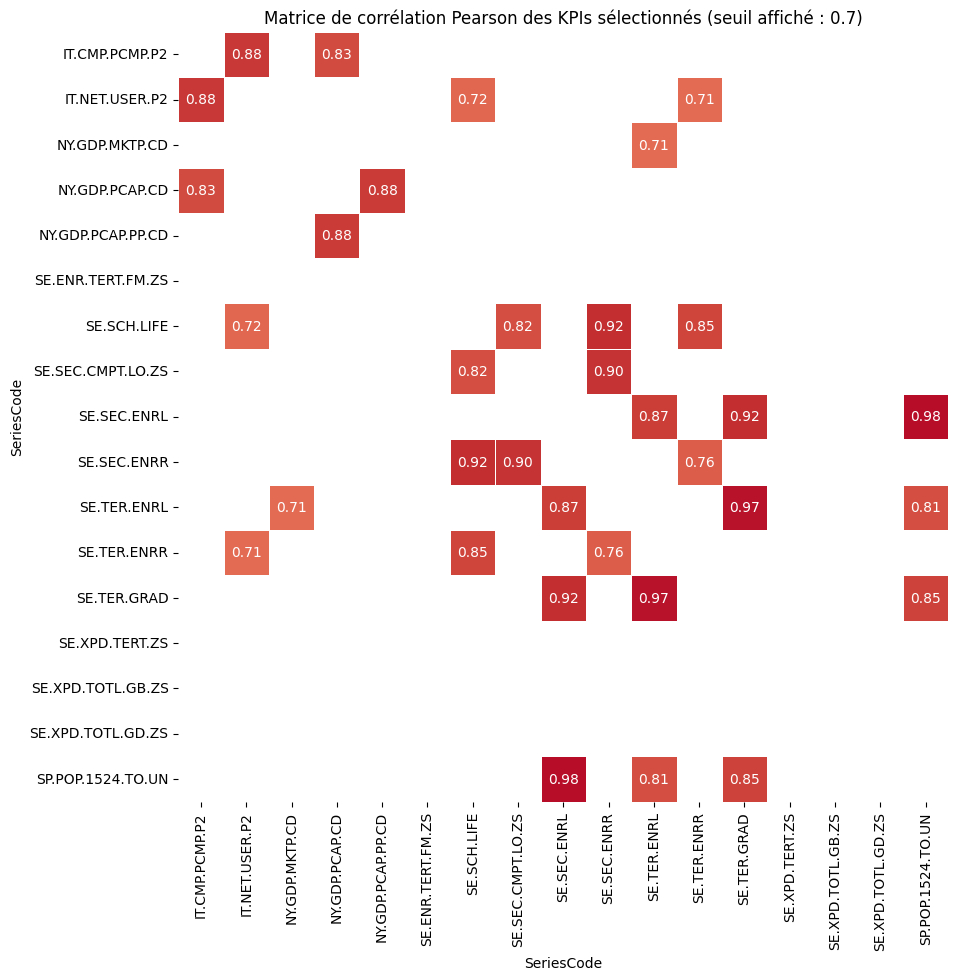

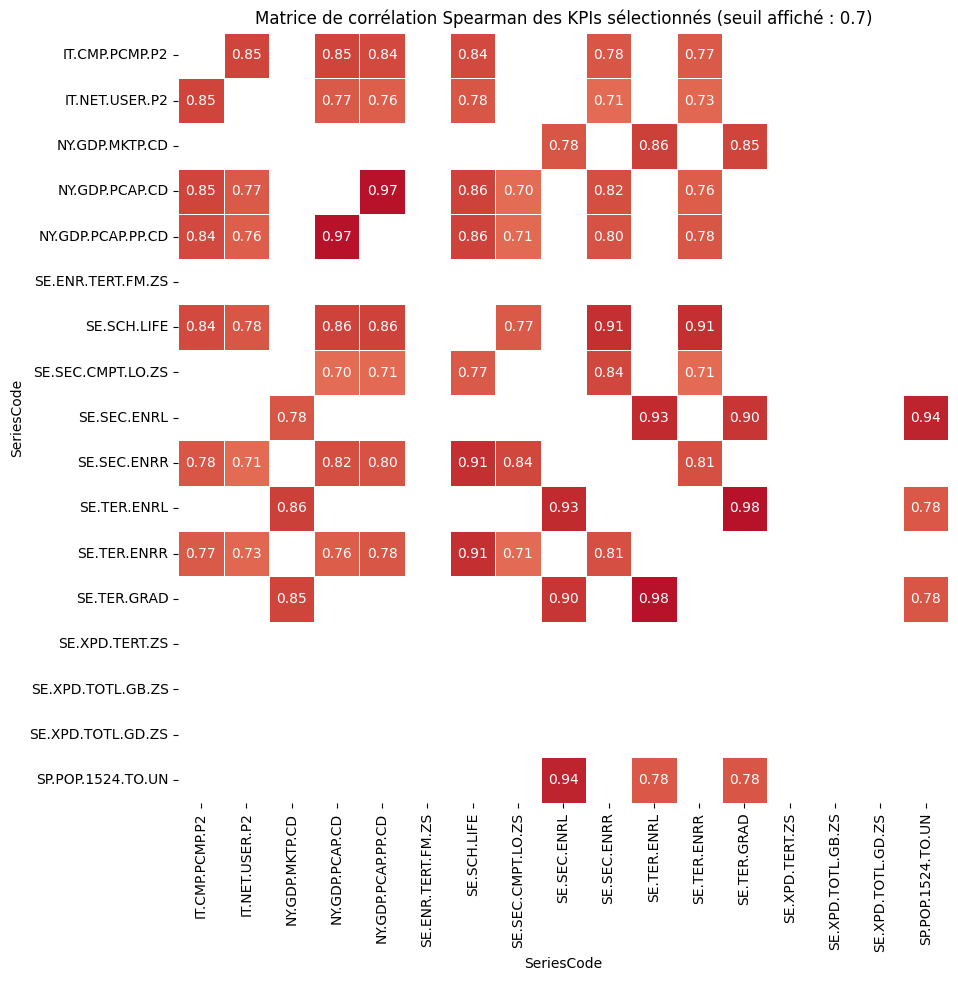

In [31]:

# Création des matrices de corrélation pour les KPI sélectionnés
corr_pearson_draft = pivot_final_data_draft_df.corr(method='pearson')
corr_spearman_draft = pivot_final_data_draft_df.corr(method='spearman')

thr = 0.7
mask_pearson = (corr_pearson_draft.abs() < thr) | np.eye(corr_pearson_draft.shape[0], dtype=bool)
mask_spearman = (corr_spearman_draft.abs() < thr) | np.eye(corr_spearman_draft.shape[0], dtype=bool)

plt.figure(figsize=(14, 10))
sns.heatmap(corr_pearson_draft, mask=mask_pearson, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1, square=True, linewidths=0.5, cbar=False)
plt.title("Matrice de corrélation Pearson des KPIs sélectionnés (seuil affiché : 0.7)")
plt.show()
plt.figure(figsize=(14, 10))
sns.heatmap(corr_spearman_draft, mask=mask_spearman, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1, square=True, linewidths=0.5, cbar=False)
plt.title("Matrice de corrélation Spearman des KPIs sélectionnés (seuil affiché : 0.7)")
plt.show()

##### Accès au numérique : `IT.CMP.PCMP.P2` vs `IT.NET.USER.P2`
- `IT.CMP.PCMP.P2` (ordinateurs pour 100 personnes) et `IT.NET.USER.P2` (utilisateurs d’Internet pour 100 personnes) décrivent tous les deux **le niveau d’équipement / accès au numérique** d’un pays.
- Dans la pratique, ces deux indicateurs évoluent souvent ensemble : **plus l’accès au numérique est développé, plus on observe à la fois plus d’équipement et plus d’usage d’Internet**.
- Pour une plateforme EdTech comme *academy*, l’enjeu principal est : *les personnes peuvent-elles accéder facilement au service en ligne ?*
**Choix : `IT.NET.USER.P2`** (plus directement lié à l’usage réel du web, donc plus pertinent pour l’adoption d’un service en ligne).

##### Pouvoir d’achat : `NY.GDP.PCAP.CD` vs `NY.GDP.PCAP.PP.CD`
- `NY.GDP.PCAP.CD` (PIB par habitant en dollars courants) et `NY.GDP.PCAP.PP.CD` (PIB par habitant en PPA) donnent une information similaire sur le **niveau de richesse moyen**.
- Cependant, le PIB/habitant en PPA est **plus comparable entre pays** car il corrige (en partie) les différences de coût de la vie et les effets de taux de change.
- Pour une logique **B2C** (capacité des individus à payer un abonnement / une formation), la **PPA** est généralement plus représentative du pouvoir d’achat réel.
**Choix : `NY.GDP.PCAP.PP.CD`**.

##### Niveau global d’éducation : `SE.SCH.LIFE` vs `SE.SEC.ENRR` / `SE.TER.ENRR`
- `SE.SCH.LIFE` (espérance de durée de scolarisation) est un indicateur **synthétique** qui résume la dynamique globale du système éducatif.
- `SE.SEC.ENRR` et `SE.TER.ENRR` (taux brut de scolarisation secondaire et tertiaire) capturent des aspects plus ciblés, mais ils sont souvent **très liés** à l’évolution générale de la scolarisation.
- Logiquement, **si l’espérance de scolarité augmente**, on observe généralement une hausse des taux de scolarisation, notamment dans le secondaire et le supérieur.
**Choix : `SE.SCH.LIFE`** pour son côté **plus global, plus lisible et plus facile à interpréter** dans une démarche d’exploration.

##### Compétences de base vs scolarisation : `SE.SEC.CMPT.LO.ZS` vs `SE.SEC.ENRR`
- `SE.SEC.CMPT.LO.ZS` (taux de complétion / compétences associées au secondaire inférieur selon la description de l’indicateur) est mécaniquement lié à la scolarisation :  
  **si les élèves ne sont pas scolarisés**, ils ne peuvent pas acquérir/valider ces compétences à grande échelle.
- À l’inverse, **une forte scolarisation** (ex. via `SE.SEC.ENRR`) est une condition nécessaire pour que les indicateurs de complétion / compétences augmentent.
- Donc une corrélation élevée entre ces KPI est attendue et n’apporte pas forcément une information indépendante.  
L’indicateur “scolarisation” sert souvent de **base** et l’indicateur “compétence/complétion” devient **redondant** dans une shortlist.

##### Effet “volume” : `SE.SEC.ENRL` / `SP.POP.1524.TO.UN` et `SE.TER.ENRL` / `SE.TER.GRAD`
- Les corrélations observées entre :
  - `SE.SEC.ENRL` (effectifs inscrits au secondaire) et `SP.POP.1524.TO.UN` (population 15–24 ans),  
  - `SE.TER.ENRL` (effectifs inscrits au tertiaire) et `SE.TER.GRAD` (diplômés du tertiaire),  
  sont principalement dues à un **effet de taille** : plus un pays est grand démographiquement, plus les volumes d’inscrits/diplômés sont élevés.
- Ces corrélations ne disent pas forcément quelque chose sur l’éducation elle-même, mais plutôt sur **la démographie**.
- Pour *academy*, la taille du vivier de clients potentiels est justement une information clé, et `SP.POP.1524.TO.UN` correspond directement à la tranche d’âge cible (lycée/université).  
**Choix : `SP.POP.1524.TO.UN`**, car il représente **à la fois** le vivier total et la cible principale, sans multiplier des KPI de volume redondants.

##### Essaie de nouveau KPIS

- `SE.TER.ENRR` — Taux brut de scolarisation dans le tertiaire
  - Indique la **pénétration de l’enseignement supérieur** (public universitaire).
  - Permet d’identifier des pays où la demande potentielle en contenus post-bac est structurellement forte.
- `SE.SEC.ENRL.VO.ZS` — Part de l’enseignement professionnel dans le secondaire (%)
  - Donne une lecture sur l’orientation **académique vs compétences/métiers**.
  - Très utile pour adapter l’offre academy :
    - pays plus “pro” → contenus orientés compétences, employabilité, certifications,
    - pays plus “académique” → contenus scolaires/disciplinaires, préparation examens.
- `SE.SEC.PRIV.ZS` — Part du privé dans le secondaire (%)
  - Proxy de **marché éducatif “marchand”** : présence d’acteurs privés, propension à payer, possibilité de partenariats.
  - Intéressant pour une stratégie B2C payante et/ou B2B avec institutions privées.
- `SL.UEM.TOTL.ZS` — Taux de chômage total (%)
  - Indicateur de **conjoncture** : niveau de risque, fragilité économique, tension sur l’emploi.
  - Peut influencer la capacité à payer (B2C) et, selon les pays, renforcer un besoin de formation (upskilling/reskilling).

##### Liste finale des KPIs
- **NY.GDP.PCAP.PP.CD** : pouvoir d’achat moyen (proxy B2C).
- **IT.NET.USER.P2** : accès réel à Internet (capacité à utiliser une plateforme en ligne).
- **SP.POP.1524.TO.UN** : vivier cible 15–24 ans (taille du marché).
- **SE.SEC.ENRR.UP** : accès/pénétration du lycée (secondaire supérieur).
- **SE.TER.ENRR** : accès/pénétration de l’enseignement supérieur.
- **SE.SEC.ENRL.VO.ZS** : orientation “pro” vs “général” (segmentation de l’offre).
- **SE.SEC.PRIV.ZS** : place du privé (propension à payer / structure de marché).
- **SE.XPD.TOTL.GD.ZS** : effort national en éducation (% du PIB).
- **SE.XPD.TOTL.GB.ZS** : priorité budgétaire de l’éducation (% dépenses publiques).
- **SE.XPD.TERT.ZS** : focus du financement sur le tertiaire (alignement avec l’offre post-bac).
- **SE.SCH.LIFE** : niveau éducatif global (indicateur synthétique).
- **NY.GDP.MKTP.CD** : taille macro du pays (effet volume / potentiel global).
- **SL.UEM.TOTL.ZS** : contexte économique / risque (chômage).

In [39]:
final_kpis = ["NY.GDP.PCAP.PP.CD", "IT.NET.USER.P2", "SP.POP.1524.TO.UN", "SE.SEC.ENRR.UP", "SE.TER.ENRR",
              "SE.SEC.ENRL.VO.ZS", "SE.SEC.PRIV.ZS", "SE.XPD.TOTL.GD.ZS", "SE.XPD.TOTL.GB.ZS", "SE.XPD.TERT.ZS",
              "SE.SCH.LIFE", "NY.GDP.MKTP.CD", "SL.UEM.TOTL.ZS"]
# On vérifie que notre liste finale de KPIs est bien présente dans les données
missing_final_kpis = [kpi for kpi in final_kpis if kpi not in country_kpi_dfs["data"]["SeriesCode"].unique()]

if missing_final_kpis:
    print(f"Les KPIs suivants sont absents des données : {', '.join(missing_final_kpis)}.")
else:
    final_country_kpi_dfs = {
        name: (rl_country if name == "country"  # on conserve le dataframe nettoyé pour les pays
               else df.merge(pd.DataFrame({'Year':relevent_years_footnote}), on='Year', how='inner') if name == 'footnote' # on filtre les footnotes par années pertinentes
               else country_kpi_relevant.merge(pd.DataFrame({'SeriesCode': final_kpis}), on='SeriesCode', how='inner') if name == 'data'
               else df.merge(pd.DataFrame({'SeriesCode': final_kpis}), on='SeriesCode', how='inner'))  # on filtre par SeriesCode pour les autres
        for name, df in country_kpi_dfs.items()
    }
    display(final_country_kpi_dfs["data"])

,CountryCode,SeriesCode,1990,1995,2000,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2015
0,AFG,SE.XPD.TOTL.GB.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.706756e+01,1.604843e+01,1.035680e+01,1.410280e+01,1.250900e+01
1,AFG,SE.XPD.TERT.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.032170e+00,8.986210e+00,1.274171e+01,1.175683e+01,1.595379e+01
2,AFG,NY.GDP.MKTP.CD,NaN,NaN,NaN,4.583644e+09,5.285466e+09,6.275074e+09,7.057598e+09,9.843842e+09,1.019053e+10,1.248694e+10,1.593680e+10,1.793024e+10,2.053654e+10,2.004633e+10,1.921556e+10
3,AFG,NY.GDP.PCAP.PP.CD,NaN,NaN,NaN,9.228294e+02,9.163345e+02,1.011596e+03,1.065620e+03,1.210479e+03,1.247066e+03,1.482099e+03,1.581601e+03,1.660740e+03,1.873154e+03,1.877412e+03,1.864974e+03
4,AFG,SE.XPD.TOTL.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.461490e+00,3.439140e+00,2.527540e+00,3.481400e+00,3.317540e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2522,ZWE,SE.SEC.PRIV.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.741034e+01,NaN,NaN
2523,ZWE,SE.SEC.ENRL.VO.ZS,0.000000e+00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2524,ZWE,SP.POP.1524.TO.UN,2.102019e+06,2476964.0,2.921453e+06,3.151277e+06,3.213812e+06,3.266903e+06,3.309907e+06,3.342927e+06,3.366486e+06,3.381553e+06,3.389035e+06,3.389423e+06,3.383141e+06,3.371070e+06,3.333716e+06
2525,ZWE,SE.SCH.LIFE,9.774430e+00,NaN,9.766410e+00,9.192870e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.040710e+01,1.031433e+01,NaN


In [33]:
# Passage en long format pour analyse des KPI sélectionnés
long_final_data_df = final_country_kpi_dfs["data"].melt(
    id_vars=["CountryCode", "SeriesCode"],
    value_vars=[str(year) for year in relevent_years],
    var_name="Year",
    value_name="Value"
)

# Pivotement des données pour avoir les KPI en colonnes
pivot_final_data_df = long_final_data_df.pivot_table(
    index=["CountryCode", "Year"],
    columns="SeriesCode",
    values="Value"
)


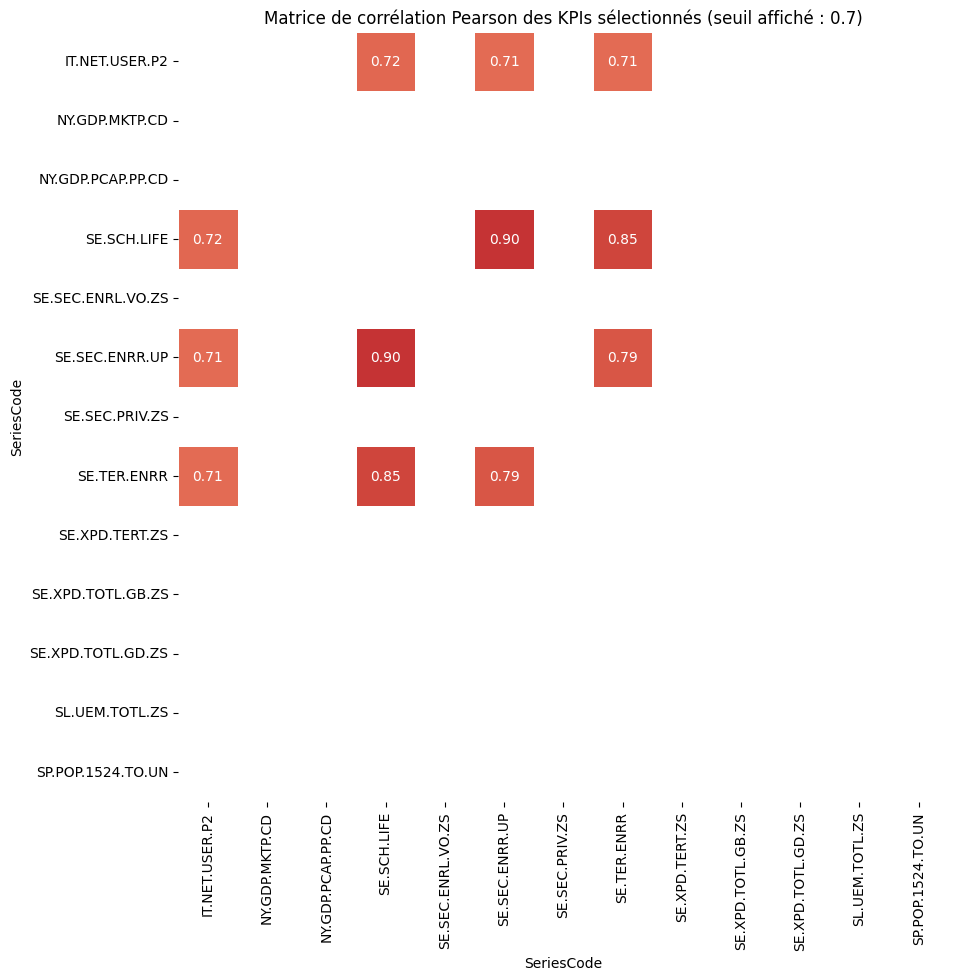

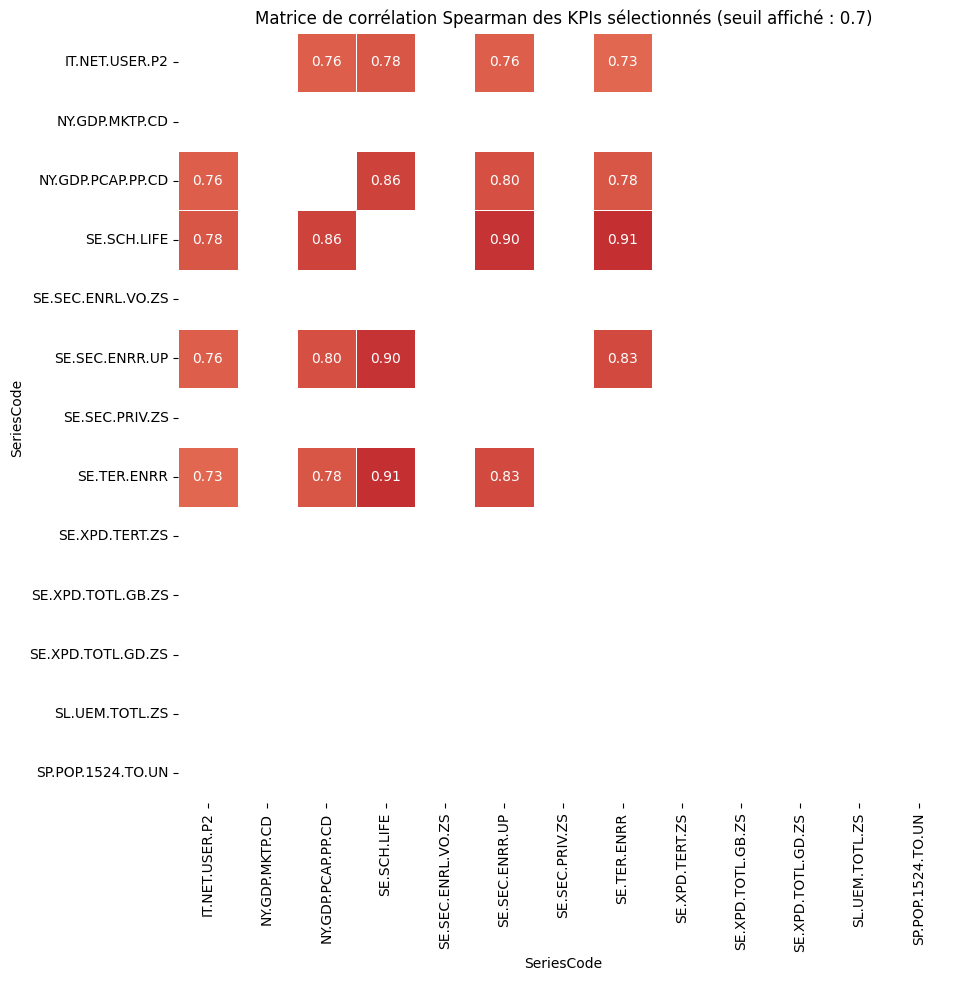

In [34]:

# Création des matrices de corrélation pour les KPI sélectionnés
corr_pearson = pivot_final_data_df.corr(method='pearson')
corr_spearman = pivot_final_data_df.corr(method='spearman')

thr = 0.7
mask_pearson = (corr_pearson.abs() < thr) | np.eye(corr_pearson.shape[0], dtype=bool)
mask_spearman = (corr_spearman.abs() < thr) | np.eye(corr_spearman.shape[0], dtype=bool)

plt.figure(figsize=(14, 10))
sns.heatmap(corr_pearson, mask=mask_pearson, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1, square=True, linewidths=0.5, cbar=False)
plt.title("Matrice de corrélation Pearson des KPIs sélectionnés (seuil affiché : 0.7)")
plt.show()
plt.figure(figsize=(14, 10))
sns.heatmap(corr_spearman, mask=mask_spearman, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1, square=True, linewidths=0.5, cbar=False)
plt.title("Matrice de corrélation Spearman des KPIs sélectionnés (seuil affiché : 0.7)")
plt.show()

Ici les matrices de corrélation montrent qu'il y a bien moins de corrélation entre les KPIs que nous avons sélectionnés.

Nous allons rester sur cette liste de KPI bien qu'il y en ai certains qui sont fortement corréler les uns avec les autres :
- ```SE.SCH.LIFE```
- ```SE.TER.ENRR```
- ```SE.SEC.ENRR.UP```
- ```NY.GDP.PCAP.PP.CD```
- ```IT.NET.USER.P2```

L'information que nous pouvons tiré de la correlation de ces indicateur reste pertinent pour ***academy*** :
- L'accès à internet et la longueur des études semble évolué dans la même direction
- L'augmentation du pouvoir d'achat semble évolué dans le même sens que le pourcentage de la population au [Lycée, Université]
- L'augmentation du pouvoir d'achat va de pair avec l'augmentation de l'accès à internet

De ces information nous pouvons en déduire :
- Le niveau de développement d'un territoire va fortement influencer la maturité du marché pour l'entreprise
- La courbe croissante sur ces indicateur pourrait permettre de découvrir et se positionner en avance sur des marché émergeant

Dans le but de présenter chaque KPI par une aggrégation et de mettre en évidence l'évolution des KPI nous utiliserons un système de moyenne pondérées.

En utilisant une demi-vie de 3 ans nous choisissons de privilégié les années les plus récente dans notre jeu de données afin de réduire l'impact passé d'une situation ayuant fortement changé.

Ce choix pourrais nous permettre en plus de confirmer l'intuition selon laquelle les pays ayant un fort taux de developpement sont des marchés matures pour ***academy*** mais également de faire ressortir les pays ayant eu des fortes évolution des données clées et donc :
- qui ont eu une pertes de maturité/pertinence pour l'entreprise
- on eu une augmentation de maturité/pertinence et qui sont ou seront de nouvelles opportunités

In [35]:
# Consolidation des données dans un dataframe Pays (lignes) - KPIs (colonnes)
# Pondération des années par leur proximité (plus l'année est récente, plus le poids est élevé)
half_life = 3  # années pour que le poids diminue de moitié
agg = (
    long_final_data_df.groupby(["CountryCode", "SeriesCode"], as_index=False)
    .apply(lambda g: exp.weighted_recent_mean(g, half_life=half_life))
    .rename(columns={None: "Value_wmean"})
)

consolidated_final_data_df = agg.pivot_table(
    index="CountryCode",
    columns="SeriesCode",
    values="Value_wmean"
)
consolidated_final_data_df.head()

C:\Users\Paulo\AppData\Local\Temp\ipykernel_38744\954149240.py:6: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda g: exp.weighted_recent_mean(g, half_life=half_life))


SeriesCode,IT.NET.USER.P2,NY.GDP.MKTP.CD,NY.GDP.PCAP.PP.CD,SE.SCH.LIFE,SE.SEC.ENRL.VO.ZS,SE.SEC.ENRR.UP,SE.SEC.PRIV.ZS,SE.TER.ENRR,SE.XPD.TERT.ZS,SE.XPD.TOTL.GB.ZS,SE.XPD.TOTL.GD.ZS,SL.UEM.TOTL.ZS,SP.POP.1524.TO.UN
CountryCode,,,,,,,,,,,,,
ABW,67.985408,2.495020e+09,35973.780510,13.456836,15.638604,91.774374,91.926033,27.142551,19.675358,21.027239,6.114103,NaN,1.369910e+04
AFG,5.214186,1.656084e+10,1655.710543,9.139549,0.981565,36.270650,2.189387,3.350518,12.718077,13.483178,3.247804,8.253255,6.382430e+06
AGO,6.485371,9.399355e+10,5878.508559,9.897088,42.218294,18.961576,10.701608,8.051480,8.516426,8.106934,3.171679,6.247036,3.885499e+06
ALB,46.584426,1.158335e+10,9796.600144,14.156033,6.858826,82.479675,6.987104,48.987793,21.929050,11.579370,3.384601,14.881395,5.849852e+05
AND,81.827041,3.223341e+09,NaN,NaN,8.023643,NaN,2.742821,NaN,4.692897,NaN,2.854148,NaN,8.217747e+03


In [36]:
kpi_cols = [c for c in consolidated_final_data_df.columns if c != "CountryCode"]

desc_consolidated = consolidated_final_data_df[kpi_cols].describe(percentiles=[.05, .10, .25, .50, .75, .90, .95]).T

desc_consolidated

,count,mean,std,min,5%,10%,25%,50%,75%,90%,95%,max
SeriesCode,,,,,,,,,,,,
IT.NET.USER.P2,208.0,3.733982e+01,2.686202e+01,0.000000e+00,2.499485e+00,4.729840e+00,1.224651e+01,3.456985e+01,5.804263e+01,7.661498e+01,8.330653e+01,9.407161e+01
NY.GDP.MKTP.CD,209.0,3.269884e+11,1.339329e+12,3.314451e+07,6.930595e+08,1.215971e+09,5.485797e+09,2.269147e+10,1.598388e+11,4.831641e+11,1.492846e+12,1.594948e+13
NY.GDP.PCAP.PP.CD,192.0,1.812887e+04,2.039368e+04,6.623984e+02,1.363082e+03,1.656588e+03,3.460691e+03,1.068501e+04,2.385263e+04,4.347551e+04,5.477812e+04,1.222022e+05
SE.SCH.LIFE,186.0,1.265647e+01,3.167462e+00,4.605445e+00,7.395541e+00,8.361223e+00,1.054949e+01,1.286657e+01,1.491346e+01,1.649051e+01,1.731637e+01,1.997664e+01
SE.SEC.ENRL.VO.ZS,195.0,1.239006e+01,1.333337e+01,0.000000e+00,0.000000e+00,4.798507e-01,2.783256e+00,6.934810e+00,1.827753e+01,3.350024e+01,3.780888e+01,7.210981e+01
SE.SEC.ENRR.UP,190.0,6.995510e+01,3.390481e+01,4.905437e+00,1.493525e+01,2.298494e+01,3.657959e+01,7.705960e+01,9.319569e+01,1.074400e+02,1.240513e+02,1.779883e+02
SE.SEC.PRIV.ZS,184.0,1.930609e+01,1.991860e+01,2.123221e-02,1.012868e+00,1.749494e+00,5.555857e+00,1.306321e+01,2.606838e+01,4.422428e+01,6.366628e+01,9.546232e+01
SE.TER.ENRR,189.0,3.409817e+01,2.677033e+01,6.254218e-01,3.045411e+00,4.444818e+00,9.734016e+00,2.714255e+01,5.785828e+01,7.133436e+01,8.091351e+01,1.021924e+02
SE.XPD.TERT.ZS,175.0,2.017475e+01,8.863495e+00,0.000000e+00,5.704711e+00,9.443550e+00,1.415935e+01,2.002035e+01,2.591691e+01,3.224989e+01,3.551160e+01,4.896160e+01


#### Justification des thresholds de sélection (Academy & Mark)

##### Objectif
L’objectif de ces thresholds est de construire une **shortlist de pays** qui soit :
- **exploitable pour Academy** (cible lycée + université : existence d’un pipeline éducatif),
- **cohérente pour Mark** (potentiel marché : maturité numérique + pouvoir d’achat),
tout en garantissant une **qualité minimale des données** (comparaisons possibles entre pays).

##### Filtre de complétude (qualité des données)
**Règle : conserver uniquement les pays avec au moins 10 KPI renseignés**.

- Raison : une sélection “métier” n’a pas de sens si les KPI sont trop manquants, car on compare alors des pays sur des bases incomplètes.
- Bénéfice : on limite les biais liés à des pays qui “passeraient” uniquement parce qu’ils ont 2–3 indicateurs présents.

#### Thresholds de maturité et de potentiel (logique métier)

##### A. Taille du vivier (capacité de marché)
**`SP.POP.1524.TO.UN` ≥ P75** (75e percentile)

- Interprétation : nombre de jeunes 15–24 ans = **vivier naturel** pour la fin du lycée et l’entrée dans le supérieur.
- Choix du **P75** : on vise des pays où le vivier est **significativement grand**, donc où le marché potentiel justifie un effort d’expansion.
- Lecture Mark : plus le vivier est large, plus le volume adressable est élevé.

##### B. Maturité numérique (accessibilité et distribution)
**`IT.NET.USER.P2` ≥ P50** (médiane)

- Interprétation : % d’utilisateurs d’Internet = proxy de **capacité d’accès** à une offre numérique (acquisition, usage, rétention).
- Choix du **P50** : on exige un minimum de maturité (ne pas être en dessous du “standard mondial”), sans exclure trop de pays.
- Lecture Academy : condition nécessaire pour que les usages d’apprentissage en ligne soient réalistes.
- Lecture Mark : réduit le risque d’un marché “non activable” digitalement.

##### C. Pipeline lycée (proxy cible Academy côté secondaire)
**`SE.SEC.ENRR.UP` ≥ P50** (médiane)

- Interprétation : taux brut de scolarisation du **secondaire supérieur** (proxy “lycée”).
- Pourquoi “gross” peut dépasser 100 : il compte les inscrits de tout âge rapportés à l’âge théorique (retards/redoublements).
- Choix du **P50** : on veut des pays où le **pipeline lycée** est au moins dans la norme, sans exiger un niveau “élite”.
- Lecture Academy : assure l’existence d’un flux significatif d’élèves au niveau lycée.

##### D. Pipeline université (cible Academy côté supérieur)
**`SE.TER.ENRR` ≥ P50** (médiane)

- Interprétation : taux brut de scolarisation **tertiaire** (accès au supérieur).
- Choix du **P50** : on écarte les pays où l’accès au supérieur est très faible, car ils seraient moins alignés avec une cible “université”.
- Lecture Academy : garantit un **socle minimal d’enseignement supérieur**.

##### E. Pouvoir d’achat (solvabilité)
**`NY.GDP.PCAP.PP.CD` ≥ P50** (médiane)

- Interprétation : PIB/habitant en parité de pouvoir d’achat (PPP) = proxy de **capacité à financer** des services (ménages/institutions).
- Choix du **P50** : on vise des pays au moins dans la moyenne mondiale en pouvoir d’achat, sans restreindre uniquement aux pays “riches”.
- Lecture Mark : réduit le risque de faible conversion / panier moyen trop bas.

##### F. Risque macro (stabilité socio-économique)
**`SL.UEM.TOTL.ZS` ≤ P50** (médiane)

- Interprétation : taux de chômage total (proxy de tension économique).
- Choix du **P50** : on favorise des pays **plus stables** (moins de risque sur la demande et le financement), tout en restant modéré.
- Lecture Mark : limite l’exposition à des marchés où la conjoncture peut freiner la demande.

#### 3) Pourquoi des percentiles (P50/P75) plutôt que des valeurs fixes ?
- Les distributions des indicateurs sont très hétérogènes (PIB/population très asymétriques).
- Les **percentiles** offrent des seuils **robustes**, comparables et justifiables : “on garde le top quartile”, “on garde la moitié supérieure”, etc.
- Cela permet aussi d’ajuster facilement la sélectivité (P60, P70…) selon la taille de shortlist recherchée.

#### 4) Interprétation du résultat
Le fait que ces thresholds aboutissent à une shortlist réduite indique que la sélection vise des pays combinant simultanément :
- un **marché potentiel important** (vivier),
- une **capacité numérique**,
- un **pipeline lycée + supérieur**,
- une **solvabilité**,
- et une **stabilité** relative.

Cette méthode produit donc une shortlist “qualifiée” (Tier 1).


In [37]:
# Garder les pays avec au moins 10 KPIs renseignés et != 0
selected_countries = consolidated_final_data_df[(consolidated_final_data_df[kpi_cols].notna().sum(axis=1) >= 10) & ~(consolidated_final_data_df[kpi_cols].fillna(0).eq(0).any(axis=1))]
temp = selected_countries[kpi_cols].quantile
thresholds = {
    "pop_p75": temp(0.75)["SP.POP.1524.TO.UN"],      # vivier
    "internet_p75": temp(0.50)["IT.NET.USER.P2"],    # maturité numérique
    "sec_up_p50": temp(0.50)["SE.SEC.ENRR.UP"],      # proxy lycée
    "ter_p50": temp(0.50)["SE.TER.ENRR"],            # accès supérieur
    "gdp_pc_p50": temp(0.50)["NY.GDP.PCAP.PP.CD"],   # pouvoir d'achat
    "unemp_p50": temp(0.50)["SL.UEM.TOTL.ZS"],       # chômage
}

final_country = selected_countries[
    (selected_countries["SP.POP.1524.TO.UN"] >= thresholds["pop_p75"]) &
    (selected_countries["IT.NET.USER.P2"] >= thresholds["internet_p75"]) &
    (selected_countries["SE.SEC.ENRR.UP"] >= thresholds["sec_up_p50"]) &
    (selected_countries["SE.TER.ENRR"] >= thresholds["ter_p50"]) &
    (selected_countries["NY.GDP.PCAP.PP.CD"] >= thresholds["gdp_pc_p50"]) &
    (selected_countries["SL.UEM.TOTL.ZS"] <= thresholds["unemp_p50"])
]


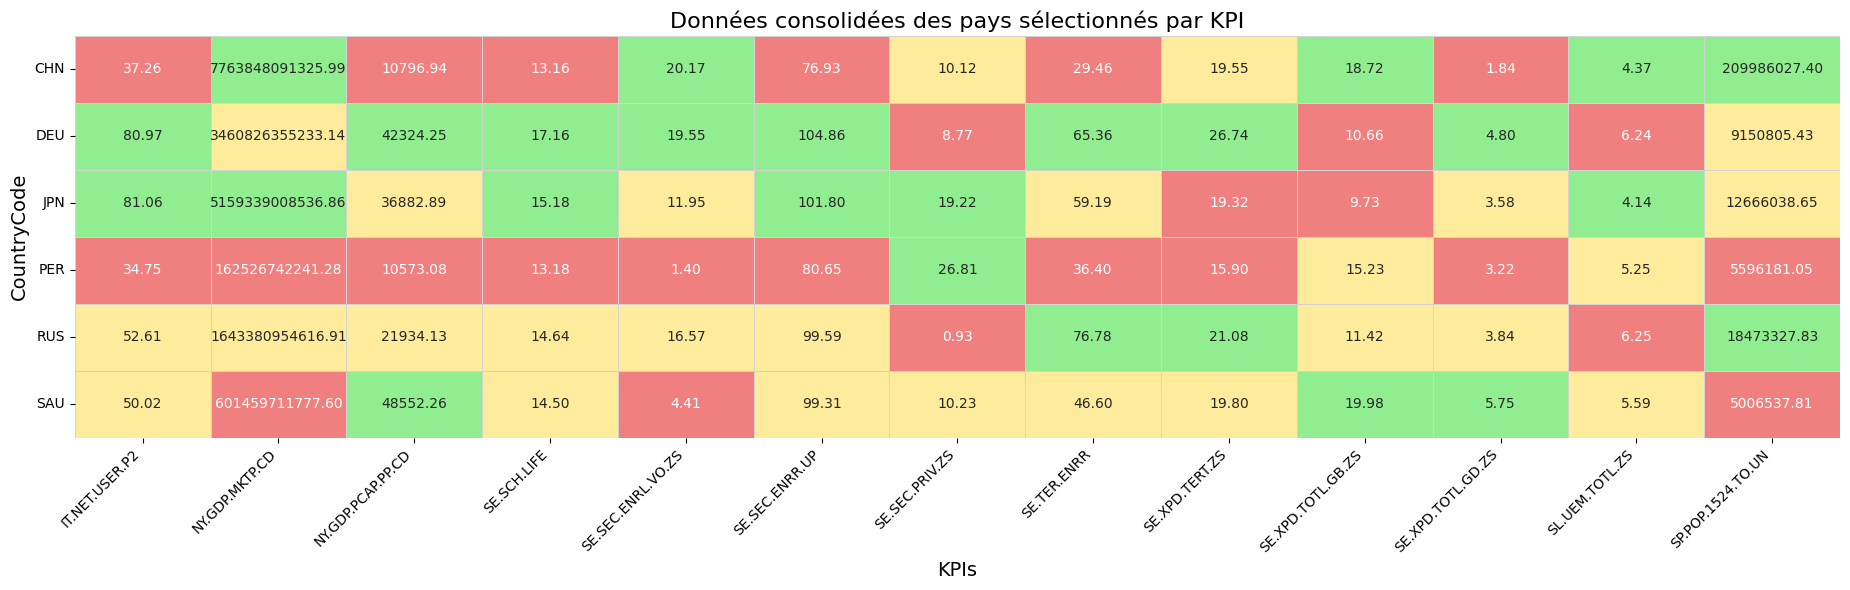

In [38]:

# Mise en forme de l'affichage des données finales
lower_is_better = ["SL.UEM.TOTL.ZS"] # Liste des KPIs où une valeur plus basse est meilleure comme le taux de chômage

# Création d'une heatmap pour visualiser les données finales
## Catégorisation des pays par KPI
cat = pd.DataFrame(0, index=final_country.index, columns=kpi_cols, dtype=int)
for col in kpi_cols:
    s = pd.to_numeric(final_country[col], errors='coerce')
    asc = col in lower_is_better
    order = s.sort_values(ascending=asc).index.tolist()

    top2 = order[:2]
    bot2 = order[-2:]
    #mid = order[2:-2]

    cat.loc[s.index, col] = 0
    cat.loc[top2, col] = 1
    cat.loc[bot2, col] = -1

## Colorisation de la heatmap
palette = sns.color_palette(["lightcoral", "white", "#ffeb9c", "lightgreen"], as_cmap=True)
plt.figure(figsize=(1.2*final_country.shape[1]+3, 0.5*final_country.shape[0]+3))

ax = sns.heatmap(
    cat,
    cmap=palette,
    vmin=-1, vmax=1,
    cbar=False,
    linewidths=0.5,
    linecolor='lightgray',
    annot=final_country,
    fmt=".2f"
)

ax.set_title("Données consolidées des pays sélectionnés par KPI", fontsize=16)
plt.xlabel("KPIs", fontsize=14)
plt.ylabel("CountryCode", fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

On remarque que les deux Pays qui ressortent après les différentes opérations sont :
- Chine
- Allemagne
- Japon
- Pérou
- Russie
- Arabie Saoudite

Cette sélection n’est pas une “vérité” définitive : elle reflète un **compromis** entre (1) la qualité/complétude des données et (2) des critères de maturité et de potentiel marché.

L’objectif est maintenant de choisir :
- **1 cible principale** pour maximiser la faisabilité et la vitesse d’exécution
- **1 cible secondaire** présentant un fort potentiel

#### Cible principale : **DEU - Allemagne**
##### Pourquoi c’est le meilleur pays “pilote”
- **Time-to-market réduit** : marché très mature digitalement et fortement connecté, ce qui facilite l’acquisition et l’usage de services en ligne.
- **Cohérence avec la cible Academy (lycée/université)** : les indicateurs de pipeline éducatif (secondaire supérieur + supérieur) sont au-dessus des seuils définis, ce qui valide l’existence d’un vivier exploitable.
- **Solvabilité élevée** : niveau économique favorable (PIB/habitant PPP au-dessus du seuil), ce qui réduit le risque de faible conversion.

> **Conclusion** : l'Allemagne est la meilleure **cible principale** pour s'implanter sur un marché mature avec un risque limité.


#### Cible secondaire : **SAU – Arabie Saoudite**
##### Pourquoi c'est un bon choix secondaire
- **Très forte solvabilité** : proxy de pouvoir d’achat élevé, ce qui peut soutenir une stratégie “premium”.
- **Maturité numérique suffisante** : condition nécessaire pour activer des canaux digitaux et/ou hybrides.
- **Pipeline éducatif existant** : les indicateurs de scolarisation au secondaire supérieur et au supérieur passent les seuils, ce qui valide la présence d’un vivier.

> **Conclusion** : l'Arabie Saoudite est retenu comme **cible secondaire** car son potentiel est élevé (solvabilité + capacité d’investissement)
